In [ ]:
'''
 * Copyright (c) 2017 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Shrinkage Methods in Regression
Shrinkage methods are a set of techniques that allow for more continuous model selection, addressing some of the limitations of subset selection methods. In subset selection, variables are either retained or discarded in a discrete process, which can introduce high variance and reduce the prediction accuracy of the full model. Shrinkage methods, such as ridge regression and lasso, shrink the coefficients of the model to reduce complexity and variance, leading to models that perform better when the predictor variables are highly correlated.

### Key Points:
Subset selection discards predictors completely or retains them, leading to interpretability but often high variance.
Shrinkage methods reduce the coefficients continuously, minimizing variance and often improving prediction accuracy.
This distinction is essential when working with high-dimensional data or when the predictors exhibit strong correlations, as shrinkage methods prevent overfitting while improving the model's stability.

### Ridge Regression

Ridge regression shrinks the regression coefficients by imposing a penalty on their size. The ridge coefficients minimize a penalized residual sum of squares:

$$
\hat{\beta}_{\text{ridge}} = \arg\min_{\beta} \left\{ \sum_{i=1}^N \left( y_i - \beta_0 - \sum_{j=1}^p x_{ij} \beta_j \right)^2 + \lambda \sum_{j=1}^p \beta_j^2 \right\}
$$

Here, $ \lambda \geq 0 $ is a complexity parameter that controls the amount of shrinkage. The larger the value of $ \lambda $, the greater the shrinkage applied to the coefficients. This method shrinks the coefficients towards zero.

Alternatively, the ridge problem can also be written as:

$$
\hat{\beta}_{\text{ridge}} = \arg\min_{\beta} \sum_{i=1}^N \left( y_i - \beta_0 - \sum_{j=1}^p x_{ij} \beta_j \right)^2 \quad \text{subject to} \quad \sum_{j=1}^p \beta_j^2 \leq t
$$

This formulation explicitly shows the size constraint on the coefficients.

In matrix form, the ridge regression objective is:

$$
\text{RSS}(\lambda) = (y - X \beta)^T (y - X \beta) + \lambda \beta^T \beta
$$

The ridge regression solution is:

$$
\hat{\beta}_{\text{ridge}} = (X^T X + \lambda I)^{-1} X^T y
$$

where $ I $ is the identity matrix. Ridge regression adds a constant to the diagonal of $ X^T X $ before inversion, ensuring the problem is non-singular even when $ X^T X $ is not of full rank.

Ridge regression can also be derived as the mean or mode of a posterior distribution. Suppose:

$$ y_i \sim \mathcal{N}(\beta_0 + \mathbf{x}_i^T \boldsymbol{\beta}, \sigma^2) $$

and the parameters $ \beta_j $ are each distributed as:

$$ \beta_j \sim \mathcal{N}(0, \tau^2) $$

independently of one another. Then, the (negative) log-posterior density of $ \beta $, with $ \tau^2 $ and $ \sigma^2 $ assumed known, is equivalent to the penalized residual sum of squares:

$$
\text{RSS}(\lambda) = (y - X \beta)^T (y - X \beta) + \lambda \beta^T \beta
$$

with $ \lambda = \frac{\sigma^2}{\tau^2} $. Thus, the ridge estimate is the mode of the posterior distribution, and because the distribution is Gaussian, it is also the posterior mean.

To further understand ridge regression, the Singular Value Decomposition (SVD) of the centered input matrix $ X $ provides additional insight. The SVD of the $ N \times p $ matrix $ X $ has the form:

$$
X = UDV^T
$$



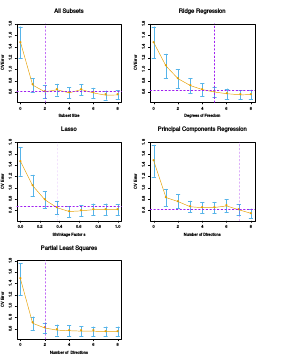
Figure 1. Estimated prediction error curves and their standard errors for the various selection and shrinkage methods. Each curve is plotted as a function of the corresponding complexity parameter for that method. The horizontal axis has been chosen so that the model complexity increases as we move from left to right. The estimates of prediction error and their standard errors were obtained by tenfold cross-validation; full details are given in Section 7.10. The least complex model within one standard error of the best is chosen, indicated by the purple vertical broken lines.

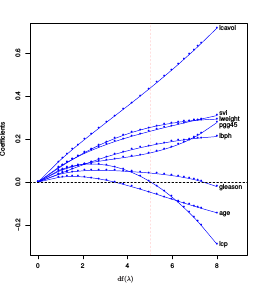
Figure 2. Proﬁles of ridge coeﬃcients for the prostate cancer example, as the tuning parameter λ is varied. Coeﬃcients are plotted versus df(λ), the eﬀective degrees of freedom. A vertical line is drawn at df = 5.0, the value chosen by cross-validation.

Here $ U $ and $ V $ are $ N \times p $ and $ p \times p $ orthogonal matrices, with the columns of \( U \) spanning the column space of $ X $, and the columns of $ V $ spanning the row space. \( D \) is a $ p \times p $ diagonal matrix, with diagonal entries $ d_1 \geq d_2 \geq \dots \geq d_p \geq 0 $ called the singular values of $ X $. If one or more values $ d_j = 0 $, $ X $ is singular. Using the singular value decomposition, we can write the least squares fitted vector as:

$$
X \hat{\beta}_{ls} = X(X^T X)^{-1}X^T y = UU^T y,
$$
after some simplification. Note that \( U^T y \) are the coordinates of \( y \) with respect to the orthonormal basis \( U \).

Now the ridge solutions are:

$$
X \hat{\beta}_{ridge} = X(X^T X + \lambda I)^{-1} X^T y = U D(D^2 + \lambda I)^{-1} D U^T y
$$

or

$$
\sum_{j=1}^p \frac{d_j^2}{d_j^2 + \lambda} u_j u_j^T y,
$$

where the \( u_j \) are the columns of \( U \). Note that since \( \lambda \geq 0 \), we have \( \frac{d_j^2}{d_j^2 + \lambda} \leq 1 \).

The SVD of the centered matrix \( X \) is another way of expressing the principal components of the variables in \( X \). The sample covariance matrix is given by:

$$
S = \frac{X^T X}{N},
$$

and from (3.45) we have:

$$
X^T X = VD^2 V^T,
$$

which is the eigen decomposition of $ X^T X $ (and of $ S $, up to a factor $ N $).

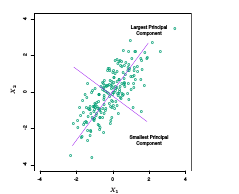
Figure 3. Principal components of some input data points. The largest prin- cipal component is the direction that maximizes the variance of the projected data, and the smallest principal component minimizes that variance. Ridge regression projects y onto these components, and then shrinks the coeﬃcients of the low– variance components more than the high-variance components.

Subsequent principal components $ z_j $ have maximum variance $ \frac{d_j^2}{N} $, subject to being orthogonal to the earlier ones. Conversely, the last principal component has minimum variance. Hence the small singular values $ d_j $ correspond to directions in the column space of $ X $ having small variance, and ridge regression shrinks these directions the most.

Ridge regression protects against the potentially high variance of gradients estimated in the short directions. The implicit assumption is that the response will tend to vary most in the directions of high variance of the inputs.

This assumption is illustrated by Figure 3, where the data points in two dimensions show that the gradient of a linear surface is more accurately determined in the long direction than the short. Ridge regression shrinks the contributions from directions of low variance, which helps stabilize the estimates.

In Figure 3, we have plotted the estimated prediction error versus the quantity:

$$
\text{df}(\lambda) = \text{tr}\left[X(X^T X + \lambda I)^{-1} X^T \right] = \text{tr}(H_\lambda) = \sum_{j=1}^p \frac{d_j^2}{d_j^2 + \lambda}
$$
(3.50)

This is a monotone decreasing function of $ \lambda $, representing the effective degrees of freedom of the ridge regression fit. In a standard linear regression with $ p $ variables, the degrees of freedom is $ p $, corresponding to the number of free parameters.

However, in ridge regression, although all $ p $ coefficients are non-zero, they are fit in a constrained manner, controlled by $ \lambda $. Thus, the degrees of freedom are effectively reduced as $ \lambda $ increases. Specifically, $ \text{df}(\lambda) = p $ when $ \lambda = 0 $ (no regularization), and $ \text{df}(\lambda) \rightarrow 0 $ as $ \lambda \rightarrow \infty $.

There is also an additional degree of freedom for the intercept, which is removed beforehand.

In Figure 1, the minimum occurs at $ \text{df}(\lambda) = 5.0 $. Yhe code shows that ridge regression reduces the test error of the full least squares estimates by a small amount.


Ridge regression coefficients (SVD): [ 2.61051517 -2.05186058]
Ridge regression coefficients (sklearn): [ 2.61051517 -2.05186058]
Mean Squared Error: 0.42479207627148746


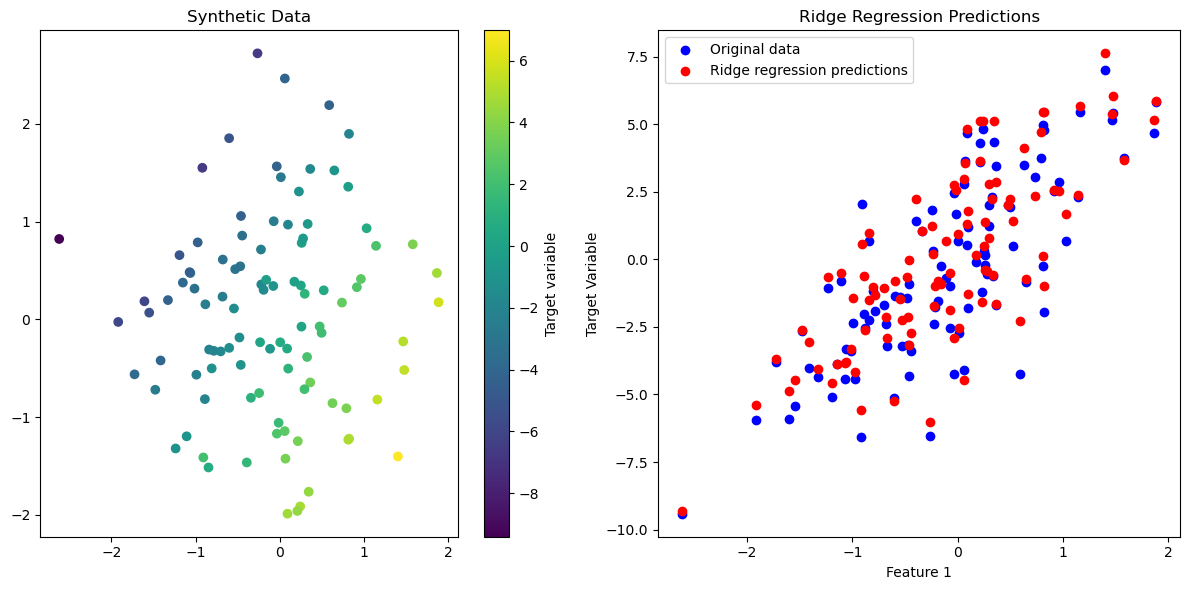

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)  # For reproducibility
N = 100  # Number of samples
p = 2    # Number of features

# Create synthetic features
X = np.random.randn(N, p)
true_coefficients = np.array([3, -2])  # True coefficients for the data
y = X @ true_coefficients + np.random.randn(N) * 0.5  # Add some noise

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the lambda (regularization) parameter
lambda_ = 1.0

# Perform ridge regression using SVD
def ridge_regression(X, y, lambda_):
    U, D, Vt = np.linalg.svd(X, full_matrices=False)
    D = np.diag(D)
    lambda_I = lambda_ * np.eye(D.shape[0])
    D2_plus_lambda_I_inv = np.linalg.inv(D @ D + lambda_I)
    D_inv = np.linalg.inv(D @ D + lambda_I) @ D
    beta_ridge = Vt.T @ D_inv @ U.T @ y
    return beta_ridge

# Compute ridge coefficients
beta_ridge = ridge_regression(X_scaled, y, lambda_)

# Perform ridge regression using sklearn for comparison
ridge = Ridge(alpha=lambda_, fit_intercept=False)
ridge.fit(X_scaled, y)
beta_sklearn = ridge.coef_

# Print the coefficients
print("Ridge regression coefficients (SVD):", beta_ridge)
print("Ridge regression coefficients (sklearn):", beta_sklearn)

# Make predictions
y_pred = X_scaled @ beta_ridge

# Compute the mean squared error
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

# Plot the results
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.colorbar(label='Target variable')
plt.title('Synthetic Data')

# Predictions
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], y, color='blue', label='Original data')
plt.scatter(X[:, 0], y_pred, color='red', label='Ridge regression predictions')
plt.title('Ridge Regression Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Target Variable')
plt.legend()

plt.tight_layout()
plt.show()


##  The Lasso

The **Lasso** (Least Absolute Shrinkage and Selection Operator) is a shrinkage method like ridge regression, but with a critical difference. The Lasso estimate is defined by:

$$
\hat{\beta}_{\text{lasso}} = \arg\min_{\beta} \left\{ \sum_{i=1}^N \left(y_i - \beta_0 - \sum_{j=1}^p x_{ij} \beta_j\right)^2 \right\} \text{ subject to } \sum_{j=1}^p |\beta_j| \leq t
$$

where $\beta_0$ is the intercept and $\beta_j$ are the coefficients. By standardizing the predictors, the intercept \(\beta_0\) can be set to the mean of \(y\), and then the model can be fitted without an intercept.

The Lasso problem can also be expressed in its Lagrangian form:

$$
\hat{\beta}_{\text{lasso}} = \arg\min_{\beta} \left\{ \frac{1}{2} \sum_{i=1}^N \left(y_i - \beta_0 - \sum_{j=1}^p x_{ij} \beta_j\right)^2 + \lambda \sum_{j=1}^p |\beta_j| \right\}
$$

Here, the L2 penalty in ridge regression is replaced by the L1 penalty, making the solutions nonlinear in \(y_i\). The Lasso constraint leads to a quadratic programming problem, though efficient algorithms are available to compute the entire path of solutions as \(\lambda\) varies.

### Key Points about the Lasso

- **Shrinkage**: Making \(t\) smaller can cause some coefficients to be exactly zero, thus performing continuous subset selection. If \(t\) is larger than \(t_0 = \frac{1}{|\hat{\beta}_j|}\), then the Lasso estimates are equivalent to least squares estimates. For \(t < t_0\), the least squares coefficients are shrunk.

## 3.4.3 Discussion: Subset Selection, Ridge Regression, and the Lasso

### Ridge Regression

- **Penalty Term**: 
$$
\lambda \sum_{j=1}^p \beta_j^2
$$
- **Effect**: Applies proportional shrinkage to all coefficients.

### Lasso

- **Penalty Term**:
$$
\lambda \sum_{j=1}^p |\beta_j|
$$
- **Effect**: Can set some coefficients to exactly zero, effectively performing feature selection.

### Subset Selection

- **Penalty Term**: Hard thresholding where coefficients smaller than the \(M\)th largest are dropped.
- **Effect**: Results in a sparse solution where some coefficients are exactly zero.
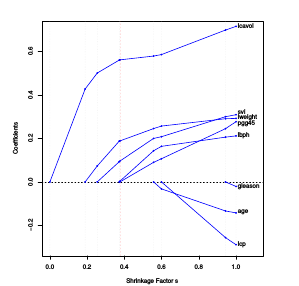
### Visual Comparison

Consider a case with two parameters:

- **Ridge Regression**: The constraint region is a disk:
$$
\beta_1^2 + \beta_2^2 \leq t
$$
- **Lasso**: The constraint region is a diamond:
$$
|\beta_1| + |\beta_2| \leq t
$$

When $p > 2$, the diamond becomes a rhomboid with more corners and flat edges, increasing the chances of some coefficients being zero.

### Generalization and Bayesian Interpretation

Both Ridge Regression and Lasso can be viewed as Bayes estimates under different priors:

$$
\beta_{\text{Bayes}} = \arg\min_{\beta} \left\{ \sum_{i=1}^N \left(y_i - \beta_0 - \sum_{j=1}^p x_{ij} \beta_j\right)^2 + \lambda \sum_{j=1}^p |\beta_j|^q \right\}
$$

where $q \geq 0$. The different values of \(q\) correspond to:

- $q = 0$: Subset Selection
- $q = 1$: Lasso
- $q = 2$: Ridge Regression

Values of \(q\) between 1 and 2 represent a compromise between Lasso and Ridge Regression. The Lasso (with $q = 1$) is unique because its constraint region is convex, making it easier to solve.

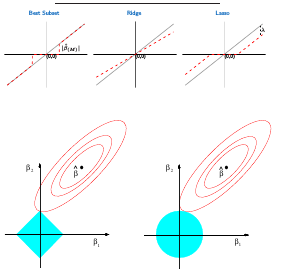


In [3]:
def lasso_regression(X, y, lambda_, num_iterations=1000, tol=1e-6):
    """
    Perform Lasso Regression using Coordinate Descent.
    
    Parameters:
    - X: numpy array of shape (N, p) where N is the number of samples and p is the number of features
    - y: numpy array of shape (N,) containing the target values
    - lambda_: regularization parameter
    - num_iterations: number of iterations for coordinate descent
    - tol: tolerance for convergence
    
    Returns:
    - beta: numpy array of shape (p,) containing the estimated coefficients
    """
    N, p = X.shape
    
    # Initialize coefficients
    beta = np.zeros(p)
    X = np.hstack((np.ones((N, 1)), X))  # Add intercept term
    X_beta = np.dot(X, beta)  # Initial prediction
    
    # Coordinate Descent
    for iteration in range(num_iterations):
        beta_old = beta.copy()
        
        for j in range(1, p + 1):
            X_j = X[:, j]
            residual = y - X_beta + X_j * beta[j]
            rho = np.dot(X_j, residual)
            
            if j == 0:
                # Intercept term
                beta[j] = rho / N
            else:
                # Update coefficient
                beta[j] = np.sign(rho) * max(0, abs(rho) - lambda_) / np.dot(X_j, X_j)
        
        X_beta = np.dot(X, beta)
        
        # Check convergence
        if np.linalg.norm(beta - beta_old) < tol:
            break
    
    return beta[1:]  # Exclude intercept term

# Fit Lasso Regression
beta_lasso = lasso_regression(X, y, lambda_)

import matplotlib.pyplot as plt

# Plot Ridge and Lasso coefficients
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(len(beta_ridge)), beta_ridge)
plt.title('Ridge Regression Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')

plt.subplot(1, 2, 2)
plt.bar(range(len(beta_lasso)), beta_lasso)
plt.title('Lasso Regression Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')

plt.tight_layout()
plt.show()

print("Lasso Regression Coefficients:", beta_lasso)


ValueError: shapes (100,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)

Ridge Regression Coefficients: [-0.18221191 -0.04157314 -0.05005074  0.0409701 ]
Lasso Regression Coefficients: [-0.06516371 -0.06115138  0.05645006]


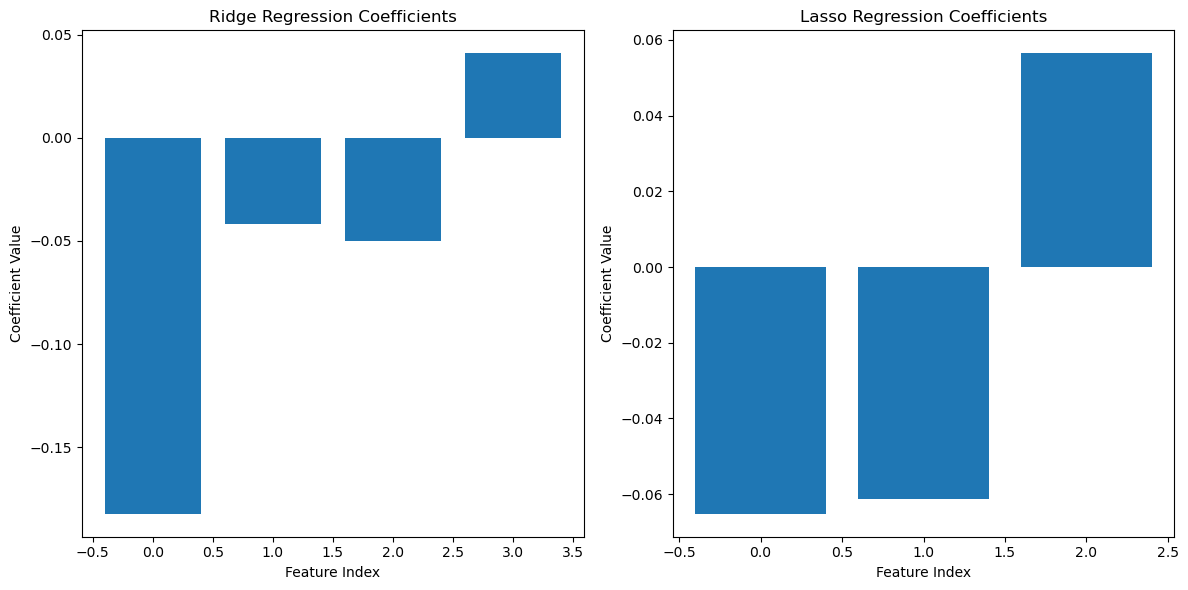

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def ridge_regression(X, y, lambda_):
    """
    Perform Ridge Regression.
    
    Parameters:
    - X: numpy array of shape (N, p) where N is the number of samples and p is the number of features
    - y: numpy array of shape (N,) containing the target values
    - lambda_: regularization parameter
    
    Returns:
    - beta: numpy array of shape (p + 1,) containing the estimated coefficients (including intercept)
    """
    N, p = X.shape
    
    # Add a column of ones to X to account for the intercept term
    X_ext = np.hstack((np.ones((N, 1)), X))  # Shape: (N, p+1)
    
    # Regularization matrix
    I = np.eye(p + 1)
    I[0, 0] = 0  # Do not regularize the intercept term
    
    # Ridge regression closed-form solution
    beta = np.linalg.inv(X_ext.T @ X_ext + lambda_ * I) @ X_ext.T @ y
    
    return beta

def lasso_regression(X, y, lambda_, num_iterations=1000, tol=1e-6):
    """
    Perform Lasso Regression using Coordinate Descent.
    
    Parameters:
    - X: numpy array of shape (N, p) where N is the number of samples and p is the number of features
    - y: numpy array of shape (N,) containing the target values
    - lambda_: regularization parameter
    - num_iterations: number of iterations for coordinate descent
    - tol: tolerance for convergence
    
    Returns:
    - beta: numpy array of shape (p,) containing the estimated coefficients
    """
    N, p = X.shape
    
    # Initialize coefficients
    beta = np.zeros(p)
    X_ext = np.hstack((np.ones((N, 1)), X))  # Add intercept term
    X_beta = np.dot(X_ext, np.hstack([np.zeros(1), beta]))  # Initial prediction
    
    # Coordinate Descent
    for iteration in range(num_iterations):
        beta_old = beta.copy()
        
        for j in range(p):
            X_j = X_ext[:, j + 1]  # j+1 because of the intercept column
            residual = y - X_beta + X_j * beta[j]
            rho = np.dot(X_j, residual)
            
            if j == 0:
                # Intercept term
                beta[j] = rho / N
            else:
                # Update coefficient
                beta[j] = np.sign(rho) * max(0, abs(rho) - lambda_) / np.dot(X_j, X_j)
        
        X_beta = np.dot(X_ext, np.hstack([np.zeros(1), beta]))
        
        # Check convergence
        if np.linalg.norm(beta - beta_old) < tol:
            break
    
    return beta

# Sample Data
np.random.seed(0)
X = np.random.randn(100, 3)
y = np.random.randn(100)
lambda_ = 1.0

# Fit Ridge Regression
beta_ridge = ridge_regression(X, y, lambda_)
print("Ridge Regression Coefficients:", beta_ridge)

# Fit Lasso Regression
beta_lasso = lasso_regression(X, y, lambda_)
print("Lasso Regression Coefficients:", beta_lasso)

# Plotting the Results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(len(beta_ridge)), beta_ridge)
plt.title('Ridge Regression Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')

plt.subplot(1, 2, 2)
plt.bar(range(len(beta_lasso)), beta_lasso)
plt.title('Lasso Regression Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')

plt.tight_layout()
plt.show()
